In [3]:
# import pandas as pd

# municipios = pd.read_excel('resources/elecciones.xlsx', index_col=False)

In [4]:
# # Arreglor el Nombre de las columnas de la tabla para poder acceder a ellas usando el "."
# municipios.columns = [i.strip().replace(' ','_') for i in municipios.columns]

# fix_col_names = list(map(lambda nombre: nombre.replace(' ','_'), col_names))
# municipios.columns = fix_col_names

# # Arreglar el los espacios adicionales en los valores string de la tabla (columnas 0, 2 y 4)
# municipios.Nombre_de_Comunidad = municipios.Nombre_de_Comunidad.apply(lambda i: i.strip())
# municipios.Nombre_de_Provincia = municipios.Nombre_de_Provincia.apply(lambda i: i.strip())
# municipios.Nombre_de_Municipio = municipios.Nombre_de_Municipio.apply(lambda i: i.strip())

# # La columna Codigo_de_Provincia debe ser string, no se deberia poder operaciones matematicas sobre ella
# municipios.Código_de_Provincia = [str(i) for i in municipios.Código_de_Provincia]

# Trabajo final Grupo 3 - Digital Transformation 

### Tema seleccionado: 

+ **Elecciones Generales**

### Integrantes:

+ Fernando Martinez
+ Inmaculada Latorre
+ Fernando Lominchar
+ Andres Plazas

## Introducción 

Este trabajo tiene como objetivo analizar los datos de las elecciones generales del 2019 con enfoque en la ciudad de Madrid. Para complementar el análisis, se suman los datos del Padron municipal, discriminados por distrito y barrio. Los datos de las elecciones se obtuvieron directamente del [Ayuntamiento de Madrid](http://www-2.munimadrid.es/CSE6/control/seleccionDatos?numSerie=7010301013), al igual que los datos del [Padron Municipal](http://www-2.munimadrid.es/TSE6/control/seleccionDatosBarrio). 

Dado la complejidad de factores que pueden llegar a incidir sobre el criterio de una persona cuando se trata de ejercer el voto por uno u otro partido político, en esta ocación, únicamnte se van se analizaran los siguientes puntos:

+ 1 Teniendo en cuenta que el PSOE es un partido de izquierda, se analizará si la influencia de la edad en el total de votos obtenidos, por distrito.  
+ 2
+ 3

Cada uno de los puntos mencionados anteriormente tendra un apartado dentro del trabajo; será posible seguir el razonamiento utilizado y observar los resultados obtenidos. 

A continuación, como primer paso, previo a cualquier análisis, se muestra el proceso de limpieza y adecuación de tablas. 

## Carga de las tablas correspondientes a las elecciones

Se descargaron las 21 tablas disponibles en la pagina del Ayuntamiento de Madrid. Cada una de ellas corresponde a un distrito, y contiene la siguiente información: 

+ Distrito
+ Barrio
+ Censo electoral
+ Abstención
+ Votos blancos 
+ Votos nulos
+ Total votos_a_candidaturas 
+ CNTG+ 
+ Cs
+ FE de las JONS
+ IU-MpM
+ M.I.
+ MAS MADRID
+ MCE
+ P-LIB
+ P.C.P.E.
+ P.P.
+ P.S.O.E. 
+ PACMA
+ PCAS-TC-PPCCAL-PACTO
+ PCTE
+ PH
+ PUM+J
+ ULEG
+ UPyD
+ VOX

A continuación se observa el código implementado para leer, limpiar, y contatenar toda la información en una gran tabla: "main_table_elecciones"


In [7]:
import pandas as pd
import os
import re

path = "resources/Tablas_elecciones_barrio/"
files = ""
tables = []
print(len(tables))
    

0


In [10]:
tables = []
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f

# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
contador = 0
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file), 
                              sep=";", encoding="ISO-8859-1")
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
    tmp_table.drop([0,1], inplace=True)
# #     print(tmp_table.Total_votos_a_candidaturas)
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", str.strip(tmp_table.iloc[i,0].upper()))
        
    tables.append(tmp_table)


# # Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=True)
# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones.head()


# Pendientes
#  OK 1 -La columna "Barrio" debe contener solo el nombre del barrio. Para el código se debe crear una nueva columna "Codigo"
# 2 -Crear una nueva columna en donde se puedan observar los porcentajes de abstención
#  OK 3- Poner el nombre del distrito (por ejemplo 'Centro') en una columna -"Distrito"- para todos los barrios que pertenecen a él


,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,PCAS-TC-PPCCAL-PACTO,PCTE,PH,PUM+J,Total_votos_a_candidaturas,ULEG,UPyD,VOX,Votos_blancos,Votos_nulos
0,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.000,5.0,5.998,...,3.0,1.0,0.0,7.0,12.369,1.0,8.0,724.0,50.0,47.0
1,10.829,EMBAJADORES,28.0,31.496,2.120,CENTRO,7.0,1.443,12.0,11.166,...,14.0,6.0,6.0,7.0,20.517,0.0,11.0,949.0,94.0,56.0
2,2.466,CORTES,6.0,7.755,779.000,CENTRO,2.0,188.000,1.0,2.410,...,1.0,3.0,2.0,2.0,5.246,0.0,3.0,300.0,27.0,16.0
3,4.225,JUSTICIA,9.0,12.838,1.518,CENTRO,6.0,183.000,4.0,3.502,...,0.0,0.0,1.0,6.0,8.554,0.0,13.0,594.0,37.0,22.0
4,7.683,UNIVERSIDAD,19.0,23.738,2.296,CENTRO,13.0,527.000,4.0,7.932,...,6.0,5.0,3.0,6.0,15.951,2.0,11.0,822.0,56.0,48.0


# Carga de los datos del Padron

Los datos del Padron municipal fueron obtenitos, al igual que los datos de las elecciones, desde la página del Ayuntamiento de Madrid. La última fecha de actulización de los datos fue 1 de noviembre del presente año. Estan discriminados por distrito y barrio, y contienen la siguiente información:

+ Distrito 
+ Barrio
+ Edad
+ Españoles Hombres
+ Españoles Mujeres
+ Españoles Total
+ Extranjeros Hombres
+ Extranjeros Mujeres
+ Extranjeros Total
+ Total Hombres 
+ Total Mujeres
+ Total

Se descargó una única tabla contoda la información, debido a ello, la tabla requirió de un gran trabajo de limpieza y ajuste. A continuación, se muestra el código implementado para obtener la tabla "main_table_padron".

In [18]:
import pandas as pd


# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")

In [20]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True))
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.head(5)


,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263.0,238.0,501.0,56.0,50.0,106.0,319.0,288.0,607.0,CENTRO,PALACIO
1,5 - 9,235.0,265.0,500.0,43.0,38.0,81.0,278.0,303.0,581.0,CENTRO,PALACIO
2,10 - 14,227.0,238.0,465.0,30.0,38.0,68.0,257.0,276.0,533.0,CENTRO,PALACIO
3,15 - 19,234.0,282.0,516.0,44.0,55.0,99.0,278.0,337.0,615.0,CENTRO,PALACIO
4,20 - 24,323.0,346.0,669.0,161.0,212.0,373.0,484.0,558.0,1042.0,CENTRO,PALACIO


In [23]:
# Homegenizar los nombres de los distritos

# vector_distritos = list(pd.unique(main_table_elecciones.Distrito))
# print(vector_distritos)
# vector_districos_padron = list(pd.unique(main_table_padron.Distrito))
# print(vector_districos_padron)
# main_table_elecciones[main_table_elecciones.Distrito == vector_distritos[2]]

# PENDIENTE REPARAR ESTO DE LOS NONOMBRE de los barrios

# print(main_table_elecciones[main_table_elecciones.Barrio == 'CASCO HISTORICO DE VALLECAS'])
# print(main_table_padron[main_table_padron.Distrito == 'VILLADEVALLECAS'])


A continuación, se realiza un *merge* de las dos tablas anteriores por 'Distrito' y 'Barrio' para obtener una única tabla con toda la información. La tabla resultante se almacena en la variable "work_table".

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# intersección de tablas por la columna Distrito y Barrio
work_table = main_table_elecciones.merge(main_table_padron, on=["Distrito", "Barrio"])
# work_table.head()
work_table.columns

Index(['Abstención', 'Barrio', 'CNTG+', 'Censo_electoral', 'Cs', 'Distrito',
       'FE_de_las_JONS', 'IU-MpM', 'M.I.', 'MAS_MADRID', 'MCE', 'P-LIB',
       'P.C.P.E.', 'P.P.', 'P.S.O.E.', 'PACMA', 'PCAS-TC-PPCCAL-PACTO', 'PCTE',
       'PH', 'PUM+J', 'Total_votos_a_candidaturas', 'ULEG', 'UPyD', 'VOX',
       'Votos_blancos', 'Votos_nulos', 'Edad', 'Españoles_Hombres',
       'Españoles_Mujeres', 'Españoles_Total', 'Extranjeros_Hombres',
       'Extranjeros_Mujeres', 'Extranjeros_Total', 'Total_Hombres',
       'Total_Mujeres', 'Total'],
      dtype='object')

## Parte 1 - Realación entre los votos obtenidos por el PSOE y la edad 

El primer paso para determinar si existe o no alguna relación entre la edad y los votos obtenidos por el PSOE, es obtener el número de personas jovenes por Distrito. Dento de esta categoría están las personas entre los 20 y 34 años.

In [27]:
# Selección de las personas de 20 a 34 años
rangos_edades = pd.unique(work_table.Edad)
rango_edades_jovenes = np.delete(rangos_edades, [0,1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
# Selección de las personas mayores de 34 años
rango_edades_no_jovenes = np.delete(rangos_edades, [0,1,2,3,4,5,6])

# Fuciones para consultar la tabla general y obtener información graficada
def seleccionar_data_por_edad(edades):
    temp_one = work_table[work_table['Edad'].isin(edades)].copy(deep=True)
    temp = temp_one.groupby(['Distrito']).agg({'Total': 'sum'}).reset_index()
    return temp

def seleccionar_data_por_partido(partido):
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
    temp = temp.groupby(['Distrito',]).agg({partido: 'sum'}).reset_index()
    return temp

# Numero de personas por distrito entre los 20 y 34 años
numero_jovenes_distrito = seleccionar_data_por_edad(rango_edades_jovenes)
numero_no_jovenes_distrito = seleccionar_data_por_edad(rango_edades_no_jovenes)
numero_jovenes_distrito['Total_adultos'] = numero_no_jovenes_distrito.Total
numero_jovenes_distrito = numero_jovenes_distrito.sort_values('Total', ascending=False)
# Numero de votos para el PSOE pror distrito
# votos_psoe_distrito = seleccionar_data_por_partido('P.S.O.E.')
# votos_psoe_distrito


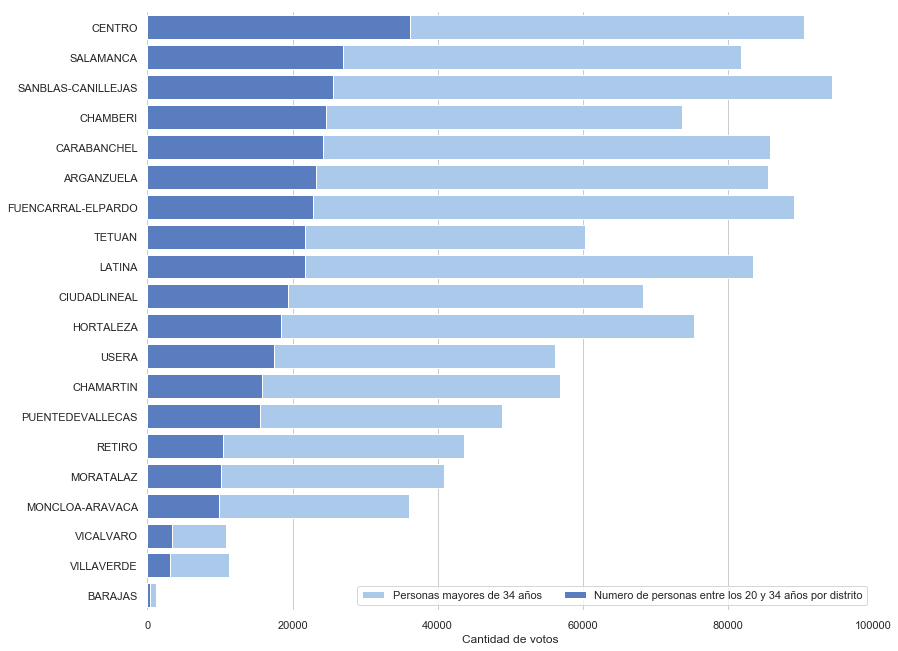

In [65]:
# # Se organiza de mayore a menor
# data_joven = numero_v_distrito_joven.sort_values('Total', ascending=False)
# data_psoe = votos_psoe_distrito.sort_values('P.S.O.E.', ascending=False)

# Se plotea la gráfica para ver los votos del PSOE por Distrito
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total_adultos", data=numero_jovenes_distrito,
            label="Personas mayores de 34 años", color="b")

sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='Total', data=numero_jovenes_distrito,
            label="Numero de personas entre los 20 y 34 años por distrito",  color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Cantidad de votos")
sns.despine(left=True, bottom=True)



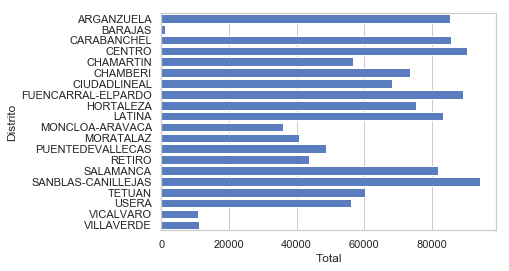

In [24]:
rango_edades_no_jovenes = np.delete(rangos_edades, [0,1,2,3,4,5,6])

numero_personas_no_jovenes_distrito = seleccionar_data_por_edad(rango_edades_no_jovenes)

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total", data=numero_personas_no_jovenes_distrito,
            label="Numero de personas entre los 20 y 34 años por distrito", color="b")


# sns.set_color_codes("muted")
# q = sns.barplot(y="Distrito" , x='P.S.O.E.', data=votos_psoe_distrito,
#             label="Número de votos para el PSOE por Distrito",  color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 40000), ylabel="",
       xlabel="Cantidad de votos")
sns.despine(left=True, bottom=True)


In [ ]:
censo_electoral_barrio = seleccionar_data_por_partido('Censo_electoral')
censo_electoral_barrio.head(15)

censo_electoral_barrio['Personas_jovenes'] = numero_v_distrito_joven.Total
censo_electoral_barrio['Personas_jovenes_porcentaje'] = numero_v_distrito_joven.Total/censo_electoral_barrio.Censo_electoral
censo_electoral_barrio
# def seleccionar_data_por_partido(partido):
#     temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
#     temp = temp.groupby(['Distrito']).agg({partido: 'sum'}).reset_index()
#     return temp
# 


In [ ]:
# plot de porcentade personas jovenes con respecto a el censo electoral
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Personas_jovenes_porcentaje",
                data=censo_electoral_barrio.sort_values('Personas_jovenes_porcentaje', ascending=False),
                color="b")
q.set(xlabel='Porcentaje de personas jovenes con respecto al censo electoral')
plt.show(q)
# sns.set_color_codes("muted")
# q = sns.barplot(y="Distrito" , x='P.S.O.E.', data=votos_psoe_distrito,
#             label="Número de votos para el PSOE por Distrito",  color="b")



# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 40000), ylabel="",
#        xlabel="Cantidad de votos")
# sns.despine(left=True, bottom=True)

In [ ]:
work_table.head()


In [ ]:
# pd.unique(work_table.Distrito) 
# work_table.groupby('Distrito').agg({'Extranjeros_Total': 'sum', 'Españoles_Total': 'sum'})
# work_table['%_mig_psoe'] = work_table.apply(lambda fila: print(fila))

# Porcentaje de extranjeros contra el total de votos a candidaturas
work_table['migrantes_Tvc'] = work_table.Extranjeros_Total *100 / work_table.Total_votos_a_candidaturas

# Porcentaje de extranjeros contra el total de de votos
work_table['migrantes_Ce'] = work_table.Extranjeros_Total *100 / work_table.Censo_electoral

work_table['migrantes_mujeres_totalvotos'] = work_table.Extranjeros_Mujeres * 100 / work_table.Censo_electoral

work_table['migrantes_hombres_totalvotos'] = work_table.Extranjeros_Hombres * 100 / work_table.Censo_electoral

x = work_table.groupby(['Distrito','Barrio']).agg({'Total': 'sum'}).reset_index()

# x = list(pd.unique(work_table.Barrio))

# # print(work_table.Extranjeros_Total[0])
# # print(work_table.Total_votos_a_candidaturas[0])
# work_table

# work_table['Extranjeros_Total'] = work_table['Extranjeros_Total'].astype(np.int64)

In [ ]:
'Abstención', 'Barrio', 'CNTG+', 'Censo_electoral', 'Cs', 'Distrito',
       'FE_de_las_JONS', 'IU-MpM', 'M.I.', 'MAS_MADRID', 'MCE', 'P-LIB',
       'P.C.P.E.', 'P.P.', 'P.S.O.E.', 'PACMA', 'PCAS-TC-PPCCAL-PACTO', 'PCTE',
       'PH', 'PUM+J', 'Total_votos_a_candidaturas', 'ULEG', 'UPyD', 'VOX',
       'Votos_blancos', 'Votos_nulos', 'Edad', 'Españoles_Hombres',
       'Españoles_Mujeres', 'Españoles_Total', 'Extranjeros_Hombres',
       'Extranjeros_Mujeres', 'Extranjeros_Total', 'Total_Hombres',
       'Total_Mujeres', 'Total'],
      dtype='object')

In [ ]:
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                
                tmp_table = pd.read_excel("resources/renta_por_barrios.xlsx", 
                              sep=";", encoding="ISO-8859-1")
                print(tmp_table.columns)
                tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
                tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
                tmp_table.drop([0,1], inplace=True)
                for i in range(0, len(tmp_table.Barrio)):
                    tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", str.strip(tmp_table.iloc[i,0].upper()))
                      
                tables.append(tmp_table)
                break
        separador_tabla += 1